In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
def generate_and_plot_data(n_samples, n_informative, n_redundant, class_sep, random_state):
    X, y = make_classification(
        n_samples=n_samples,
        n_features=2,
        n_informative=n_informative,
        n_redundant=n_redundant,
        class_sep=class_sep,
        random_state=random_state,
        n_clusters_per_class=1
    )

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Class 0', marker='o')
    plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Class 1', marker='x')
    plt.show()

    return X_train, y_train



In [3]:
def train_and_plot_svm2(X_train, y_train, kernel, C):
    svm_classifier = SVC(kernel=kernel, C=C)
    svm_classifier.fit(X_train, y_train)

    plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Class 0', marker='o')
    plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Class 1', marker='x')

    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()

    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
    Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k', marker='.')

    for i in [-1, 0, 1]:
        plt.plot(xx[0, :], yy[i, :], 'k--', alpha=0.3)

    plt.title(f"SVM with {kernel} kernel (C={C})")
    plt.legend()
    plt.show()


In [4]:
def train_and_plot_svm(X_train, y_train, kernel, C):
    svm_classifier = SVC(kernel=kernel, C=C)
    svm_classifier.fit(X_train, y_train)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
    Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)  # Use a colorful colormap
    plt.colorbar()  # Add a colorbar for reference
    
    plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Class 0', marker='o')
    plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Class 1', marker='x')

    # Plot support vectors with different colors
    plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1],
                s=100, c='red', marker='.', label='Support Vectors')

    plt.title(f"SVM with {kernel} kernel (C={C})")
    plt.legend()
    plt.show()

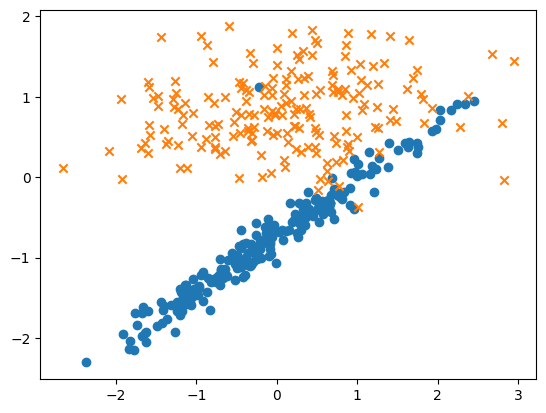

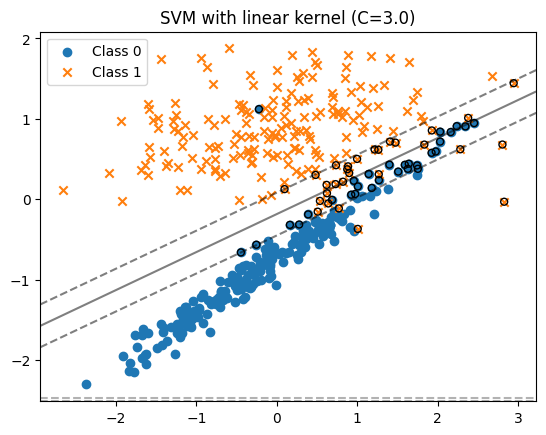

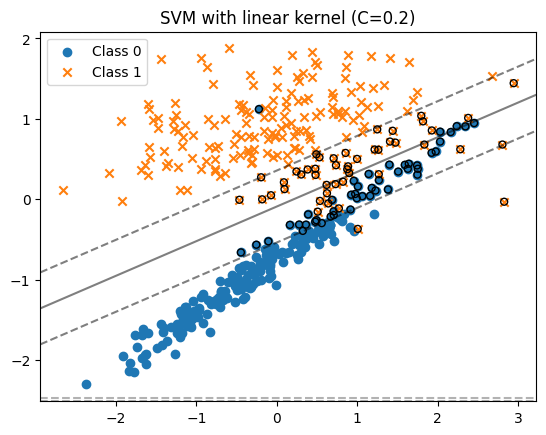

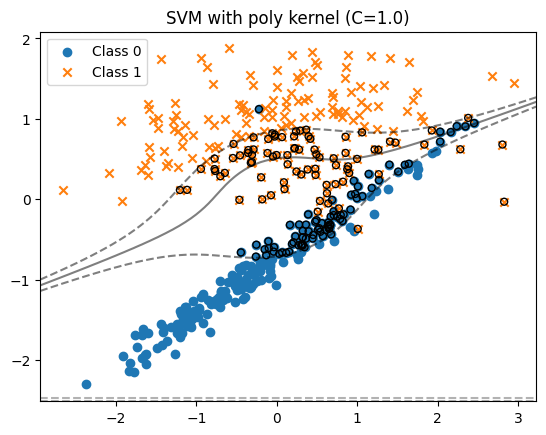

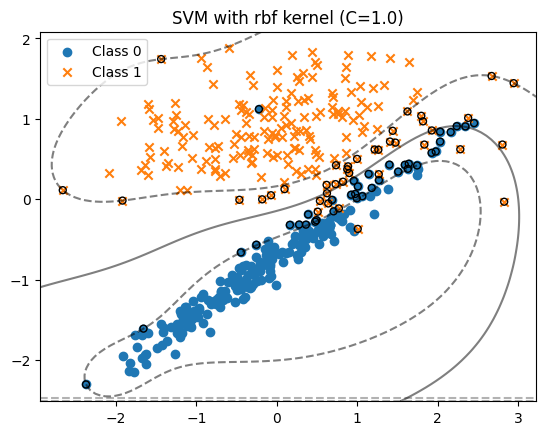

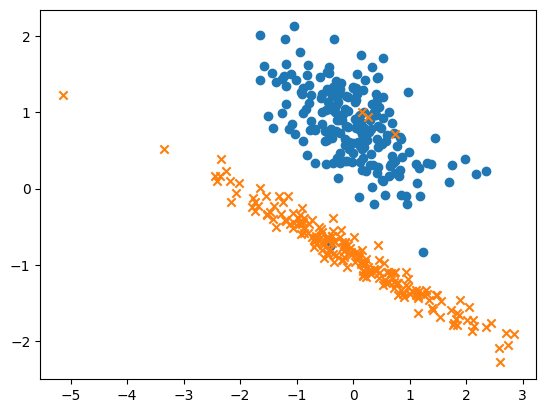

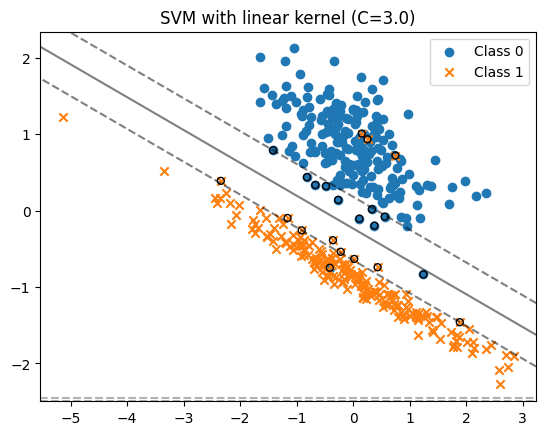

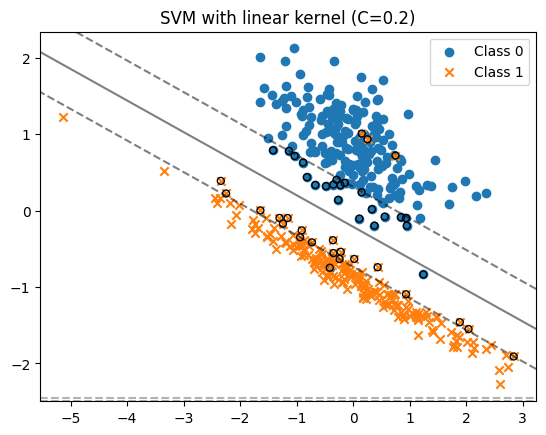

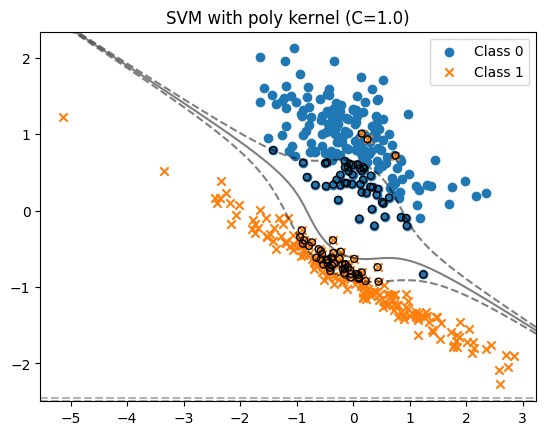

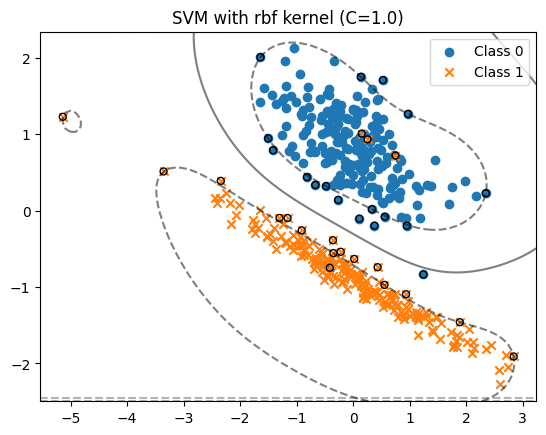

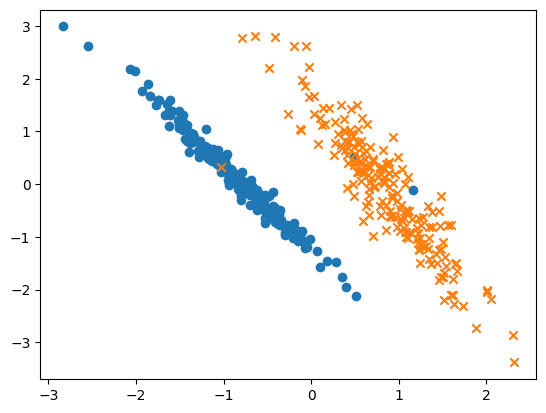

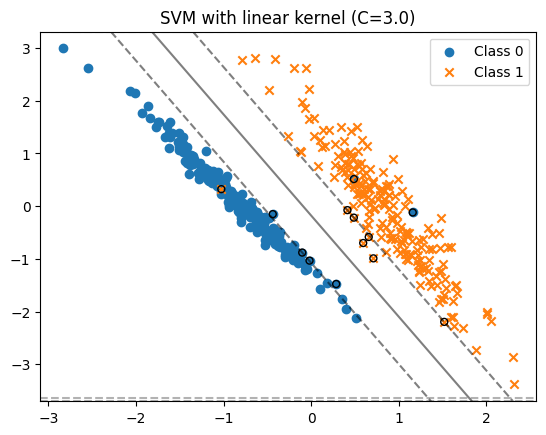

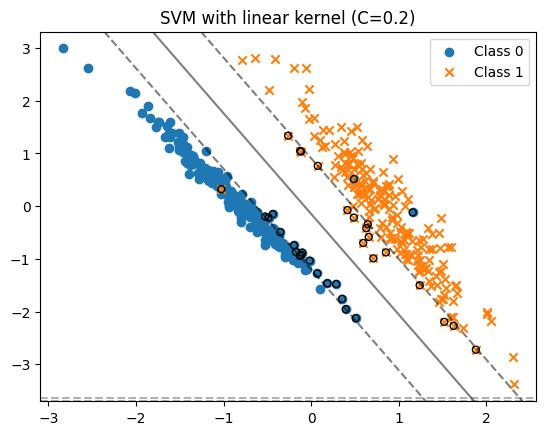

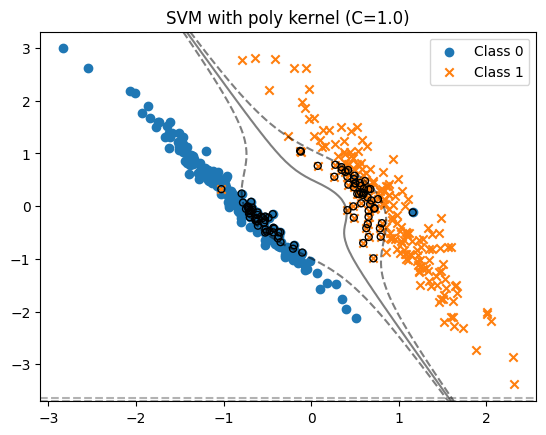

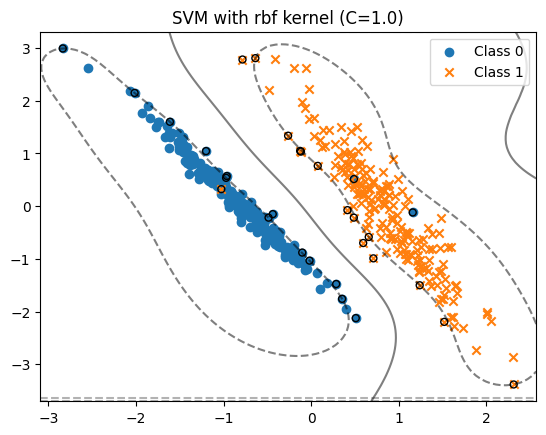

In [6]:
np.random.seed(42)
for i in range(3):
    X_train, y_train = generate_and_plot_data(n_samples=500, n_informative=2, n_redundant=0, class_sep=1.5, random_state=i)
    #train_and_plot_svm(X_train, y_train, kernel='linear', C=1.0)
    #train_and_plot_svm(X_train, y_train, kernel='poly', C=1.0)
    #train_and_plot_svm(X_train, y_train, kernel='rbf', C=1.0)
    train_and_plot_svm2(X_train, y_train, kernel='linear', C=3.0)
    train_and_plot_svm2(X_train, y_train, kernel='linear', C=0.2)
    train_and_plot_svm2(X_train, y_train, kernel='poly', C=1.0)
    train_and_plot_svm2(X_train, y_train, kernel='rbf', C=1.0)


